In [ ]:
#conexión a la cuenta de drive a la raiz de archivos
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import pandas as pd

In [ ]:
compras_df = pd.read_csv("/content/drive/MyDrive/Maestria CIENCIA DE DATOS/Inteligencia Artificial/Unidad 2/Tarea grupo/notebooks/data/clean_compras_2016.csv")

In [ ]:
data = compras_df.copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16738 entries, 0 to 16737
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FECHA     16738 non-null  object 
 1   FACTURA   16738 non-null  object 
 2   NOMBRE    16738 non-null  object 
 3   RFC       16738 non-null  object 
 4   CONCEPTO  16738 non-null  object 
 5   IMPORTE   16738 non-null  float64
 6   SHEET     16738 non-null  object 
dtypes: float64(1), object(6)
memory usage: 915.5+ KB


## Llenar los valores faltantes del dataframe

In [ ]:
data.head()

,FECHA,FACTURA,NOMBRE,RFC,CONCEPTO,IMPORTE,SHEET
0,2016-01-30 00:00:00,B139-12-2015,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,COMISIONES BANCARIAS CORRESPONDIENTE AL MES DE...,23.20,CONTRATISTAS
1,2016-01-30 00:00:00,B162-12-2015,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,COMISIONES BANCARIAS CORRESPONDIENTE AL MES DE...,394.40,CONTRATISTAS
2,2016-01-30 00:00:00,B166-12-2015,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,COMISIONES BANCARIAS CORRESPONDIENTE AL MES DE...,394.40,CONTRATISTAS
3,2016-01-30 00:00:00,B182-12-2015,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,COMISIONES BANCARIAS CORRESPONDIENTE AL MES DE...,295.80,CONTRATISTAS
4,2016-01-30 00:00:00,B185-12-2015,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,COMISIONES BANCARIAS CORRESPONDIENTE AL MES DE...,6.96,CONTRATISTAS


In [ ]:
for i, column in enumerate(list(str(d) for d in data.dtypes)):
    if column == "object":
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].mode())
        data[data.columns[i]] = data[data.columns[i]].astype("category").cat.codes
    else:
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].median())

In [ ]:
data.head()

,FECHA,FACTURA,NOMBRE,RFC,CONCEPTO,IMPORTE,SHEET
0,2,10497,2286,265,1094,23.20,1
1,2,10509,2286,265,1094,394.40,1
2,2,10510,2286,265,1094,394.40,1
3,2,10511,2286,265,1094,295.80,1
4,2,10513,2286,265,1094,6.96,1


# a. Modelo supervisado

## i. Implementar Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
y = data.pop("IMPORTE")
X = data.copy()

In [ ]:
y.shape

(16738,)

In [ ]:
X.shape

(16738, 6)

In [ ]:
X

,FECHA,FACTURA,NOMBRE,RFC,CONCEPTO,SHEET
0,2,10497,2286,265,1094,1
1,2,10509,2286,265,1094,1
2,2,10510,2286,265,1094,1
3,2,10511,2286,265,1094,1
4,2,10513,2286,265,1094,1
...,...,...,...,...,...,...
16733,217,3529,2999,289,3427,4
16734,224,10843,3097,194,2467,4
16735,224,10843,3097,194,2468,4
16736,216,10843,3412,289,1299,4


## Dividir los datos en dos grupos

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
clf = RandomForestRegressor(n_estimators=1500, max_depth=12)

In [ ]:
clf.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, n_estimators=1500)

## ii. Evaluar al modelo

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, clf.predict(X_test))

0.5997331504220456

Resultado: el 0.598 indica que aproximadamente el 59.9% de la variación en la variable dependiente está siendo explicada por el modelo.

# b. Modelo no supervisado

###i. Tome como variables de entrada: el número de contratos, la suma del importe, el número de facturas y una variable adicional del dataset (Especifique en los comentarios del notebook cual fue la variable que consideró). Implementar K-means y PCA

In [131]:
#import warnings
#warnings.filterwarnings("ignore", category=UserWarning, modules="sklearn")
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [132]:
compras_df.head()

,FECHA,FACTURA,NOMBRE,RFC,CONCEPTO,IMPORTE,SHEET
0,2016-01-30 00:00:00,B139-12-2015,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,COMISIONES BANCARIAS CORRESPONDIENTE AL MES DE...,23.20,CONTRATISTAS
1,2016-01-30 00:00:00,B162-12-2015,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,COMISIONES BANCARIAS CORRESPONDIENTE AL MES DE...,394.40,CONTRATISTAS
2,2016-01-30 00:00:00,B166-12-2015,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,COMISIONES BANCARIAS CORRESPONDIENTE AL MES DE...,394.40,CONTRATISTAS
3,2016-01-30 00:00:00,B182-12-2015,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,COMISIONES BANCARIAS CORRESPONDIENTE AL MES DE...,295.80,CONTRATISTAS
4,2016-01-30 00:00:00,B185-12-2015,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,COMISIONES BANCARIAS CORRESPONDIENTE AL MES DE...,6.96,CONTRATISTAS


In [133]:
compras_df_c = compras_df.copy()

In [134]:
compras_df_c['NOMBRE'] = compras_df_c['NOMBRE'].str.strip()

In [135]:
# Convertir la columna 'FECHA' a datetime si no lo está ya
compras_df_c['FECHA'] = pd.to_datetime(compras_df_c['FECHA'])

# Explicación de variables usadas para el aprendizaje no supervisado
En el ejemplo de la clase contábamos con columnas como: CONTRATO, IMPORTE, FACTURAS.
En los excels del año 2016 no poseemos la columna CONTRATO.
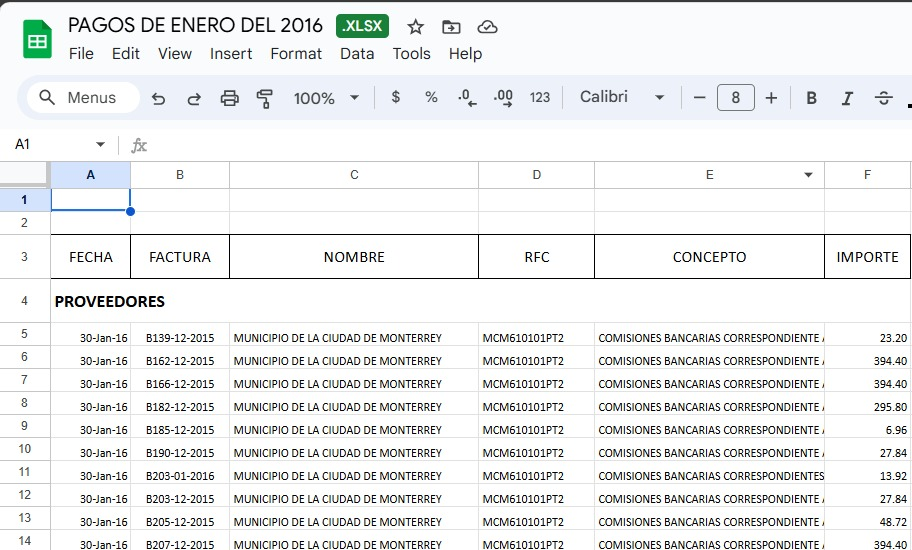
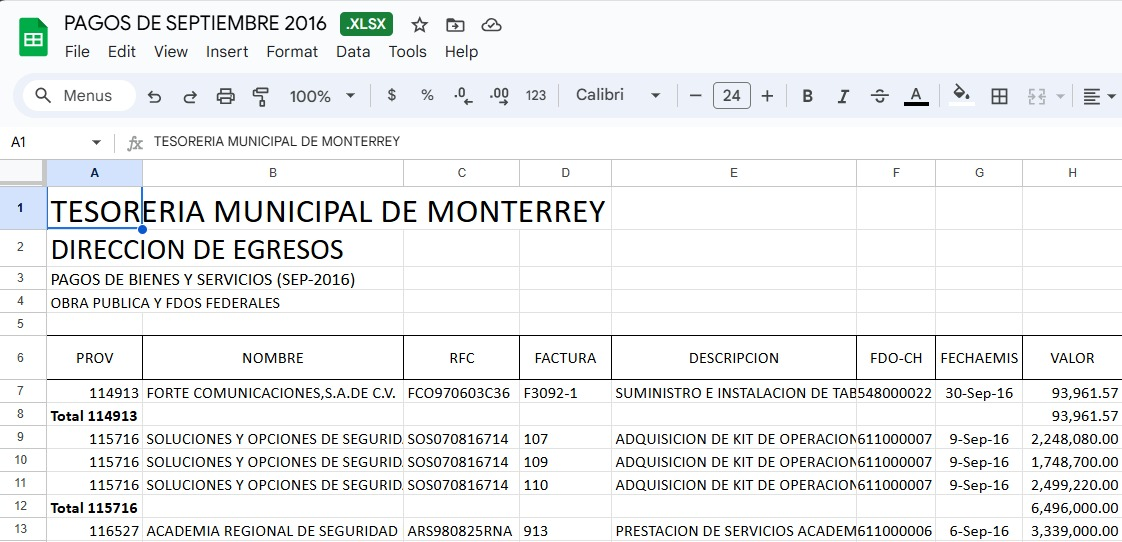

Como no tenemos la columna contrato hemos decidido tomar la columna RFC.
Entonces usaremos las siguientes columnas:
- RFC: Número de RFC únicos asociados a cada entidad.
- FACTURA: Número de transacciones o facturas únicas por entidad.
- IMPORTE: **Suma total** y **promedio** del importe facturado por cada entidad.
- FECHA: Rango de días entre la primera y la última transacción de cada entidad.

In [136]:
compras_df_c_grupo = compras_df_c.groupby("NOMBRE").agg({
    "RFC": lambda x: x.nunique(),
    "FACTURA": lambda x: x.nunique(),  # Número de transacciones (facturas únicas)
    "IMPORTE": ["sum", "mean"],  # Suma total del importe y promedio del importe por transacción
    "FECHA": lambda x: (x.max() - x.min()).days  # Rango de días entre la primera y la última transacción
})

In [137]:
compras_df_c_grupo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3509 entries, (F BBVA) ALMACEN PAPELERO SALDAÑA, S.A. DE to ZUÑIGA MENDEZ MARIA GUADALUPE
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (RFC, <lambda>)      3509 non-null   int64  
 1   (FACTURA, <lambda>)  3509 non-null   int64  
 2   (IMPORTE, sum)       3509 non-null   float64
 3   (IMPORTE, mean)      3509 non-null   float64
 4   (FECHA, <lambda>)    3509 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 164.5+ KB


In [138]:
pd.set_option('display.max_rows', None)
compras_df_c_grupo.head()

RFC  FACTURA  \
                                                   <lambda> <lambda>   
NOMBRE                                                                 
(F BBVA) ALMACEN PAPELERO SALDAÑA, S.A. DE                1        3   
(F BBVA) BCX TRADING CO, S.A. DE C.V.                     1        2   
(F BBVA) BIOANALISIS Y SERVICIOS HEMAT, S.A. DE C.        1        6   
(F BBVA) CCT MEXICO,S.A.DE C.V.                           1        8   
(F BBVA) COMERCIAL ALPRO,S.A.DE C.V.                      1       24   

                                                       IMPORTE                 \
                                                           sum           mean   
NOMBRE                                                                          
(F BBVA) ALMACEN PAPELERO SALDAÑA, S.A. DE            91811.85   30603.950000   
(F BBVA) BCX TRADING CO, S.A. DE C.V.                703021.58  351510.790000   
(F BBVA) BIOANALISIS Y SERVICIOS HEMAT, S.A. DE C.   293044.91   48840.818333   
(F BBVA) CCT MEXICO,S.A.DE C.V.                     4492455.35  561556.918750   
(F BBVA) COMERCIAL ALPRO,S.A.DE C.V.                 785029.56   32709.565000   

                                                      FECHA  
                                                   <lambda>  
NOMBRE                                                       
(F BBVA) ALMACEN PAPELERO SALDAÑA, S.A. DE                0  
(F BBVA) BCX TRADING CO, S.A. DE C.V.                     0  
(F BBVA) BIOANALISIS Y SERVICIOS HEMAT, S.A. DE C.        0  
(F BBVA) CCT MEXICO,S.A.DE C.V.                          40  
(F BBVA) COMERCIAL ALPRO,S.A.DE C.V.                     19

In [139]:
compras_df_cluster = compras_df_c_grupo.reset_index()
compras_df_cluster.head()

NOMBRE      RFC  FACTURA  \
                                                     <lambda> <lambda>   
0         (F BBVA) ALMACEN PAPELERO SALDAÑA, S.A. DE        1        3   
1              (F BBVA) BCX TRADING CO, S.A. DE C.V.        1        2   
2  (F BBVA) BIOANALISIS Y SERVICIOS HEMAT, S.A. D...        1        6   
3                    (F BBVA) CCT MEXICO,S.A.DE C.V.        1        8   
4               (F BBVA) COMERCIAL ALPRO,S.A.DE C.V.        1       24   

      IMPORTE                   FECHA  
          sum           mean <lambda>  
0    91811.85   30603.950000        0  
1   703021.58  351510.790000        0  
2   293044.91   48840.818333        0  
3  4492455.35  561556.918750       40  
4   785029.56   32709.565000       19

In [140]:
compras_df_c_grupo_f = compras_df_c_grupo.reset_index().drop(["NOMBRE"], axis=1)

<ipython-input-140-8d0ac75fda0b>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  compras_df_c_grupo_f = compras_df_c_grupo.reset_index().drop(["NOMBRE"], axis=1)


In [141]:
normalizado_compras_df = (compras_df_c_grupo_f-compras_df_c_grupo_f.min())/(compras_df_c_grupo_f.max()-compras_df_c_grupo_f.min())
normalizado_compras_df.head()

RFC   FACTURA   IMPORTE               FECHA
  <lambda>  <lambda>       sum      mean  <lambda>
0      0.0  0.003175  0.000048  0.002261  0.000000
1      0.0  0.001587  0.000369  0.026010  0.000000
2      0.0  0.007937  0.000154  0.003610  0.000000
3      0.0  0.011111  0.002357  0.041555  0.118694
4      0.0  0.036508  0.000412  0.002417  0.056380

##ii. Implementa el método del "Codo de Jambú" para encontrar el número óptimo de clusters al utilizar K-means

In [142]:
wcss = []

In [143]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=300)
    kmeans.fit(normalizado_compras_df)
    wcss.append(kmeans.inertia_)


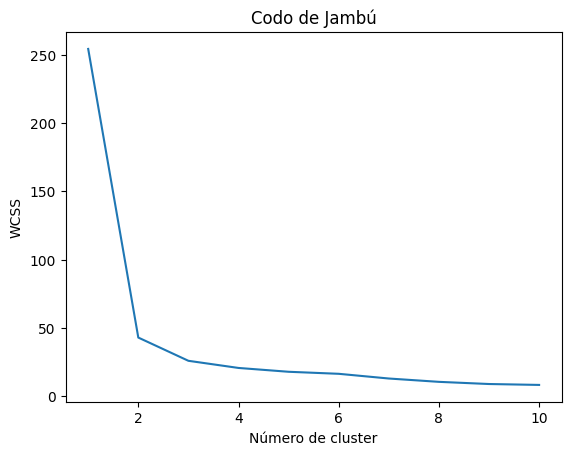

In [144]:
plt.plot(range(1, 11), wcss)
plt.title("Codo de Jambú")
plt.xlabel("Número de cluster")
plt.ylabel("WCSS") # Indica la cantidad de similitud de los individuos
plt.show()

Según el método del codo tenemos que el número de k óptimo es de 2

In [145]:
clustering = kmeans = KMeans(n_clusters=2, max_iter=300)
kmeans.fit(normalizado_compras_df)

KMeans(n_clusters=2)

In [146]:
compras_df_cluster["KMeans_Cluster"] = clustering.labels_

In [147]:
compras_df_cluster["KMeans_Cluster"].value_counts()

,count
KMeans_Cluster,
0,3070
1,439


## iii. Implementar una gráfica de dispersión que visualiza los clusters obtenidos mediante K-means en el espacio reducido de 2 dimensiones usando PCA.

In [148]:
from sklearn.decomposition import PCA

In [149]:
pca = PCA(n_components=2)

In [150]:
pca_compras = pca.fit_transform(normalizado_compras_df)

In [151]:
pca_compras_df = pd.DataFrame(data=pca_compras, columns=["componente_1", "componente_2"])

In [152]:
pca_nombres_beneficiario = pd.concat([pca_compras_df, compras_df_cluster["KMeans_Cluster"]], axis=1)

In [156]:
pca_nombres_beneficiario.head()

,componente_1,componente_2,KMeans_Cluster
0,-0.106959,-0.002640,0
1,-0.106674,0.012212,0
2,-0.106737,-0.000600,0
3,0.012469,0.019308,0
4,-0.049261,0.003038,0


In [154]:
plt.figure(figsize=(10,8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

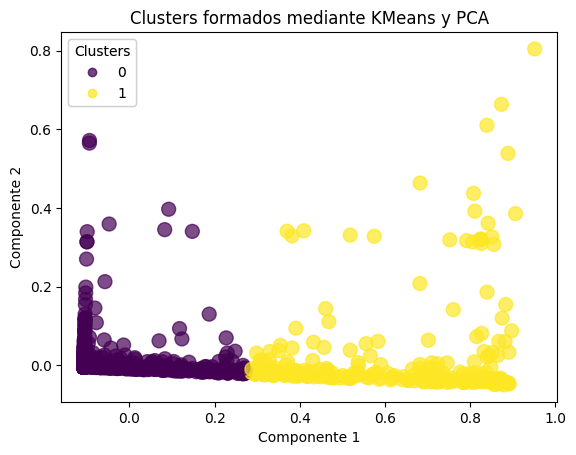

In [155]:
scatter = plt.scatter(pca_nombres_beneficiario['componente_1'],
                      pca_nombres_beneficiario['componente_2'],
                      c = pca_nombres_beneficiario["KMeans_Cluster"],
                      cmap='viridis',
                      s=100,
                      alpha=0.7)

plt.title("Clusters formados mediante KMeans y PCA")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)
